## Importando datos de la estacion DAVIS [raw] - Imata

In [1]:
import pandas as pd
import numpy as np
import glob
from dateutil.parser import parse
import matplotlib.pyplot as plt

In [2]:
f = '../Data/001_Raw/Davis/Imata_11.07.2023.10.13am.txt'

## Función para leer archivos .TXT generados por las estaciones meteorologicas Davis

In [3]:
def read_davis(f, estacion):

    '''
    Trabaja con las librerias pandas y numpy
    Lee los archivos .txt generados por las estaciones meteorologicas Davis
    
    Input:
        f: Ingresa la ruta del archivo txt
        estacion: Igresa la estacián, "kallapuma", "imata", "tantamaco"
    Output:
        Genera un archivo csv
    '''
    if estacion == "kallapuma" or "tantamaco":
        nombres = ['Date','Time', 'Temp Out', 'Hi Temp', 'Low Temp', 'Out Hum', 'Dew Pt', 'Wind Speed', 'Wid Dir',
                   'Wind Run','Hi Speed', 'Hi Dir', 'Wind Chill', 'Heat Index', 'THW Index', 'THSW index', 'Bar', 'Rain',
                   'Rain Rate','Solar Rad', 'Solar Energy', 'Hi Solar Rad', 'UV Index', 'UV Dose', 'Hi UV', 'Heat D-D',
                   'Cool D-D', 'In Temp', 'In Hum', 'In Dew', 'In Heat', 'In EMC', 'In Air Density', 'ET', 'Wind Samp',
                   'Wind Tx', 'ISS Recept', 'Arc Int']
        
    elif estacion == "imata":
        nombres = ['Date','Time',"unknown", 'Temp Out', 'Hi Temp', 'Low Temp', 'Out Hum', 'Dew Pt', 'Wind Speed',
                   'Wid Dir','Wind Run','Hi Speed', 'Hi Dir', 'Wind Chill', 'Heat Index', 'THW Index', 'THSW index',
                   'Bar', 'Rain','Rain Rate','Solar Rad', 'Solar Energy', 'Hi Solar Rad', 'UV Index', 'UV Dose',
                   'Hi UV', 'Heat D-D','Cool D-D', 'In Temp', 'In Hum', 'In Dew', 'In Heat', 'In EMC', 'In Air Density',
                   'ET', 'Wind Samp','Wind Tx', 'ISS Recept', 'Arc Int']

    names = {"Temp Out": "To","Out Hum": "RH","Wind Speed": "WS","Wid Dir": "WD","Bar": "P","Solar Rad": "Ig"}
    
    grados = {'N':0, 'NNE':22.5, 'NE':45, 'ENE':67.5, 'E':90, 'ESE':112.5, 'SE':135, 'SSE':157.5, 'S':180, 'SSW':202.5,
                'SW':225, 'WSW':247.5, 'W':270, 'WNW':292.5, 'NW':315, 'NNW':337.5}
    
    # Lee el archivo .txt, une las columnas de fecha y hora, los comviete es datetime y los lleva al index
    df = pd.read_csv(f, sep="\t", skiprows=2, header=None, names=nombres, low_memory=False)

    df["date"] = df.Date + " " + df.Time
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)

    df.set_index("date", inplace=True, )
    df.drop(["Date", "Time"], axis=1, inplace=True)
    
    # Renombra las columnas mas usadas
    df.rename(columns=names, inplace = True)
    df2 = df.copy()
    data = df2[["To","Ig", "RH", "P", "WS", "WD"]]
    
    #Comvierte la simboligia de la direccion de viento (WD) a grados
    davis = data.copy()
    davis.WD = davis.WD.map(grados)
    
    print(f)
    return davis

In [4]:
df = read_davis(f, "imata")
df

../Data/001_Raw/Davis/Imata_11.07.2023.10.13am.txt


,To,Ig,RH,P,WS,WD
date,,,,,,
2019-04-08 15:40:00,---,---,---,29.663,0.0,NaN
2019-04-08 15:41:00,---,---,---,29.664,0.0,NaN
2019-04-08 15:42:00,---,---,---,29.663,0.0,NaN
2019-04-08 15:43:00,---,---,---,29.663,0.0,NaN
2019-04-08 15:44:00,---,---,---,29.661,0.0,NaN
...,...,...,...,...,...,...
2023-06-28 10:00:00,-7.3,0,64,30.013,3.0,315.0
2023-06-28 11:00:00,-7.9,1,64,30.014,3.0,315.0
2023-06-28 12:00:00,-5.7,68,60,30.019,4.0,315.0


## Informacion del DF

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28547 entries, 2019-04-08 15:40:00 to 2023-06-28 14:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   To      28547 non-null  object 
 1   Ig      28547 non-null  object 
 2   RH      28547 non-null  object 
 3   P       28547 non-null  object 
 4   WS      28547 non-null  float64
 5   WD      23466 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.5+ MB


## object to float64

In [6]:
davis = df.apply(pd.to_numeric, errors="coerce").fillna(np.nan)

In [7]:
davis

,To,Ig,RH,P,WS,WD
date,,,,,,
2019-04-08 15:40:00,NaN,NaN,NaN,29.663,0.0,NaN
2019-04-08 15:41:00,NaN,NaN,NaN,29.664,0.0,NaN
2019-04-08 15:42:00,NaN,NaN,NaN,29.663,0.0,NaN
2019-04-08 15:43:00,NaN,NaN,NaN,29.663,0.0,NaN
2019-04-08 15:44:00,NaN,NaN,NaN,29.661,0.0,NaN
...,...,...,...,...,...,...
2023-06-28 10:00:00,-7.3,0.0,64.0,30.013,3.0,315.0
2023-06-28 11:00:00,-7.9,1.0,64.0,30.014,3.0,315.0
2023-06-28 12:00:00,-5.7,68.0,60.0,30.019,4.0,315.0


In [8]:
davis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28547 entries, 2019-04-08 15:40:00 to 2023-06-28 14:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   To      28511 non-null  float64
 1   Ig      28514 non-null  float64
 2   RH      28512 non-null  float64
 3   P       28545 non-null  float64
 4   WS      28547 non-null  float64
 5   WD      23466 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


## Graficas

<Axes: xlabel='date'>

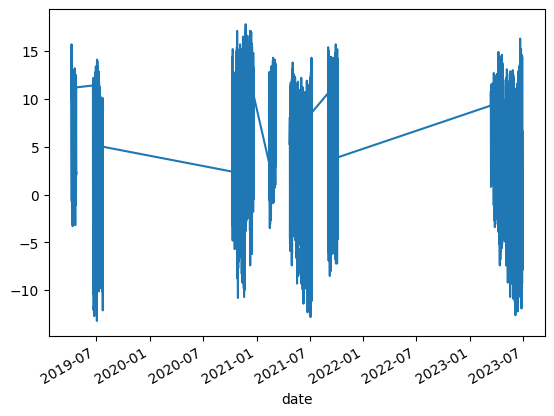

In [9]:
davis.To.plot()

## 2023

<Axes: xlabel='date'>

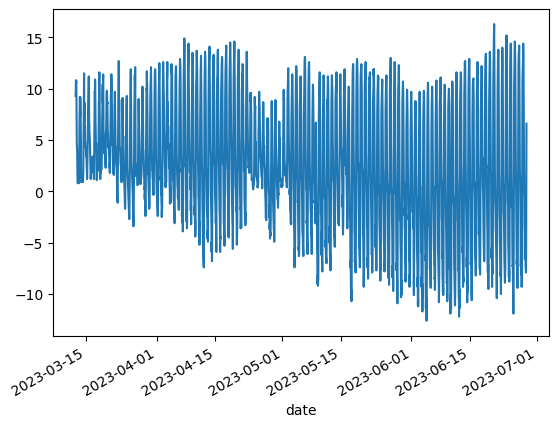

In [10]:
davis.To.loc["2023"].plot()

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

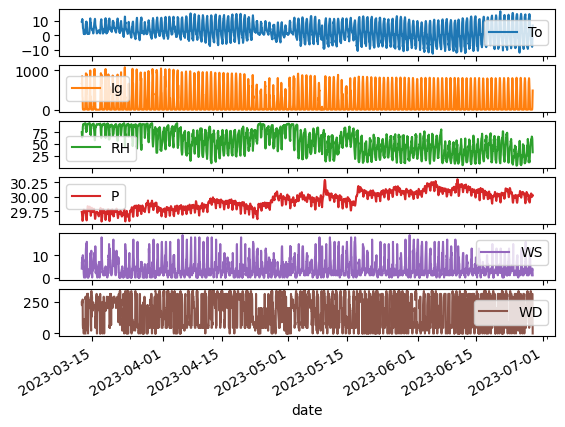

In [11]:
davis.loc["2023"].plot(subplots = True)

# 2. Senamhi - Imata

In [12]:
h = "../Data/001_Raw/Senamhi/table1.csv"

In [13]:
def import_SenamhiImata(f):

    nombres = ["fecha", "hora", "To", "rain", "RH", "WD", "WS"]

    df = pd.read_csv(f, skiprows=11, header=None, names=nombres)

    df["date"] = df["fecha"] + " " + df["hora"]
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)

    df.set_index("date", inplace=True, )
    df.drop(["fecha", "hora"], axis=1, inplace=True)
    
    return df

In [14]:
archivos = glob.glob("../Data/001_Raw/Senamhi/table*.csv")

In [15]:
lista = []
for archivo in archivos:
    lista.append(import_SenamhiImata(archivo))

    imata = pd.concat(lista, axis=0)

In [16]:
imata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4970 entries, 2023-01-01 00:00:00 to 2023-07-27 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   To      4970 non-null   object
 1   rain    4970 non-null   object
 2   RH      4970 non-null   object
 3   WD      4970 non-null   object
 4   WS      4970 non-null   object
dtypes: object(5)
memory usage: 233.0+ KB


In [17]:
senamhi = imata.apply(pd.to_numeric, errors="coerce").fillna(np.nan)
senamhi # Datos meteorologicos de SENAMHI para imata

,To,rain,RH,WD,WS
date,,,,,
2023-01-01 00:00:00,0.3,0.1,100.0,291.0,1.7
2023-01-01 01:00:00,0.7,0.2,100.0,268.0,2.0
2023-01-01 02:00:00,0.8,0.3,100.0,275.0,1.6
2023-01-01 03:00:00,0.8,0.3,100.0,217.0,1.2
2023-01-01 04:00:00,1.0,0.2,100.0,1.0,NaN
...,...,...,...,...,...
2023-07-27 19:00:00,-0.8,0.0,23.0,271.0,4.0
2023-07-27 20:00:00,-2.1,0.0,28.0,294.0,4.5
2023-07-27 21:00:00,-2.6,0.0,31.0,269.0,3.3


In [18]:
senamhi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4970 entries, 2023-01-01 00:00:00 to 2023-07-27 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   To      4959 non-null   float64
 1   rain    4953 non-null   float64
 2   RH      4957 non-null   float64
 3   WD      4955 non-null   float64
 4   WS      4919 non-null   float64
dtypes: float64(5)
memory usage: 233.0 KB


<Axes: xlabel='date'>

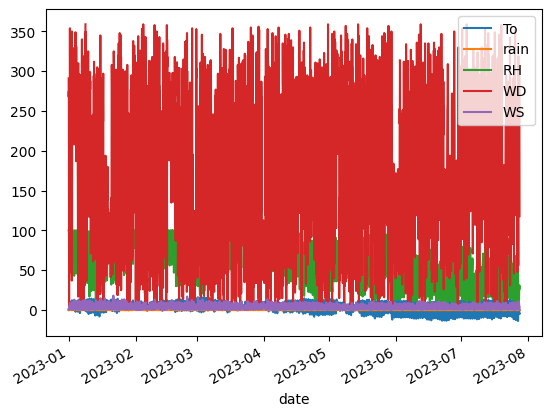

In [19]:
senamhi.plot()

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

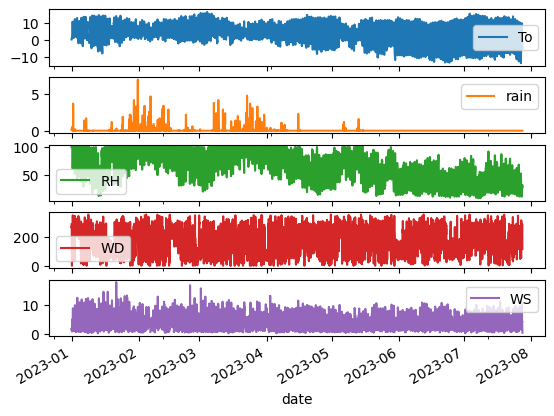

In [20]:
senamhi.plot(subplots = True)

# Davis - Senamhi

In [21]:
dav23 = davis.loc["2023"]

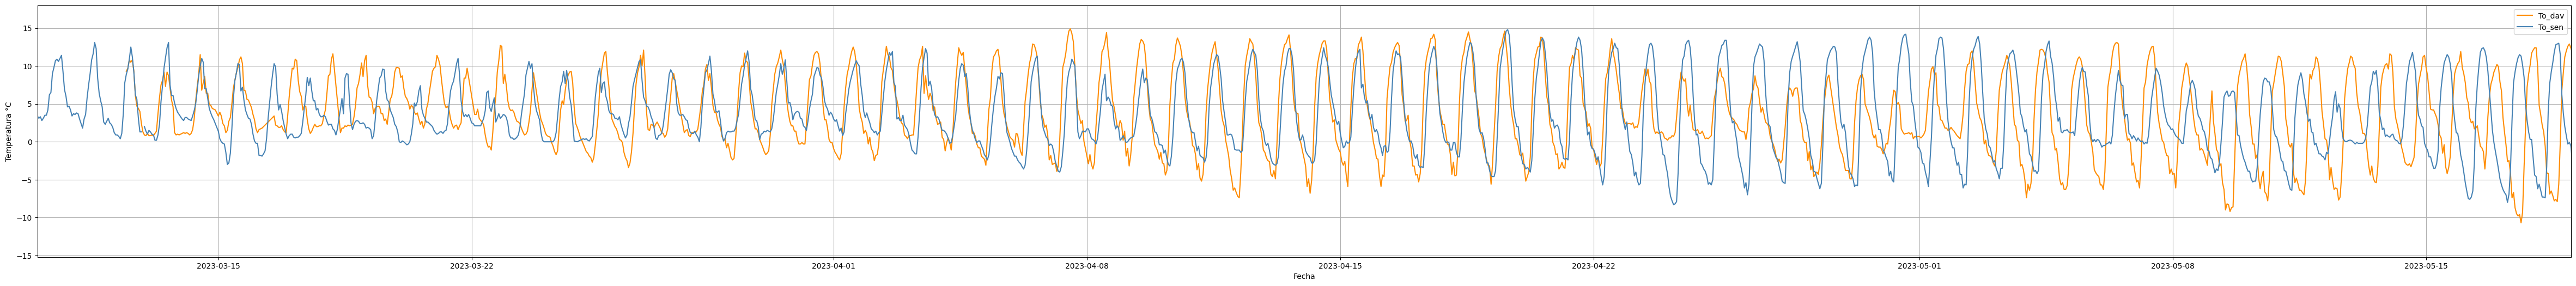

In [22]:
fig, ax = plt.subplots(figsize = (60,6))
fecha1 = parse('2023-03-10')
fecha2 = fecha1 + pd.Timedelta('70D')

ax.plot(dav23.To, 'darkorange' , label = 'To_dav')
ax.plot(senamhi.To, 'steelblue', label = 'To_sen')
# ax.plot(exp.T_int, 'k*', label = 'Ti_exp')


ax.set_xlim(fecha1, fecha2)
# ax.set_ylim(-5,20)
# ax.set_ylim(-10, 30)

plt.xlabel('Fecha')
plt.ylabel('Temperatura °C')
plt. grid()
ax.legend()

In [23]:
senamhi.to_csv('../Data/002_Processed/senamhi_imata_2023.csv')
dav23.to_csv('../Data/002_Processed/davis_imata_2023.csv')

In [24]:
dav23c = pd.read_csv('../Data/002_Processed/davis_imata_2023C.csv', sep = ";", index_col=0, parse_dates=True, dayfirst=True)
dav23c

,To,Ig,RH,P,WS,WD
date,,,,,,
2023-03-24 00:00:00,1.8,0,90,29.728,3,67.5
2023-03-24 01:00:00,1.1,0,90,29.756,2,90.0
2023-03-24 02:00:00,0.8,0,89,29.764,1,67.5
2023-03-24 03:00:00,0.7,0,90,29.755,0,NaN
2023-03-24 04:00:00,0.6,0,90,29.753,0,NaN
...,...,...,...,...,...,...
2023-07-10 04:00:00,-7.3,0,64,30.013,3,315.0
2023-07-10 05:00:00,-7.9,1,64,30.014,3,315.0
2023-07-10 06:00:00,-5.7,68,60,30.019,4,315.0


In [25]:
dav23c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2277 entries, 2023-03-24 00:00:00 to 2023-07-10 08:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   To      2277 non-null   float64
 1   Ig      2277 non-null   int64  
 2   RH      2277 non-null   int64  
 3   P       2277 non-null   float64
 4   WS      2277 non-null   int64  
 5   WD      2267 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 124.5 KB


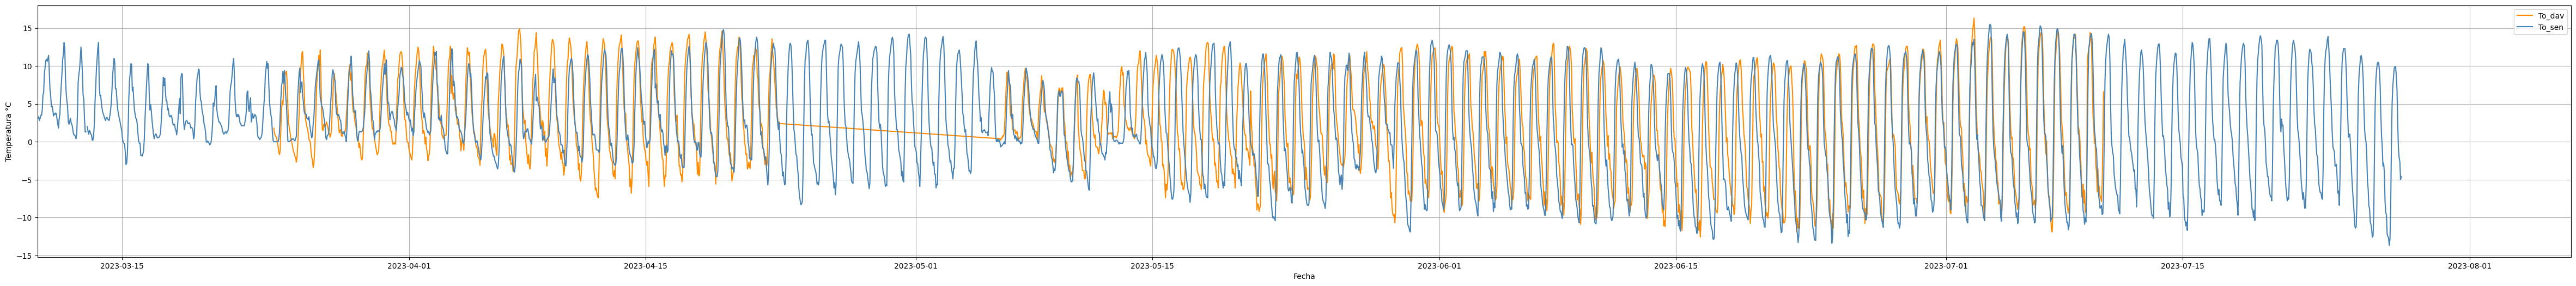

In [26]:
fig, ax = plt.subplots(figsize = (60,6))
fecha1 = parse('2023-03-10')
fecha2 = fecha1 + pd.Timedelta('150D')

ax.plot(dav23c.To, 'darkorange' , label = 'To_dav')
ax.plot(senamhi.To, 'steelblue', label = 'To_sen')

ax.set_xlim(fecha1, fecha2)
# ax.set_ylim(-5,20)
# ax.set_ylim(-10, 30)

plt.xlabel('Fecha')
plt.ylabel('Temperatura °C')
plt. grid()
ax.legend()